# Business Problem

Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase


## Objective.

In order to anaylize the difference in aircraft safety. We first must determine which aircrafts cause the most accidents, we will do by determining the following:

* Analyzing the amount of different accidents fatal, serious, Non-Fatal
* Aircraft damage
* Injury Severity

I'll first proceed by installing the neccessary libraries needed to complete these objectives

Import neccessary libraries from python


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Extract the data required, found in the NTSB database.

In [3]:
data = pd.read_csv('./data/AviationData.csv', encoding='latin-1')

C:\Users\omend\AppData\Local\Temp\ipykernel_43364\2146229675.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./data/AviationData.csv', encoding='latin-1')


In [4]:
data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [6]:
data['Injury.Severity'].values

array(['Fatal(2)', 'Fatal(4)', 'Fatal(3)', ..., 'Non-Fatal', nan, 'Minor'],
      dtype=object)

In [7]:
data['Injury.Severity'].isna().sum()

1000

Based off the information we see that there are missing items within the injury severity, and aircraft damage

In [8]:
data.dropna(subset=['Injury.Severity', 'Make', 'Aircraft.damage'], inplace=True)

In [9]:
data.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     45
Country                     210
Latitude                  51886
Longitude                 51896
Airport.Code              36254
Airport.Name              33723
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         54803
Registration.Number        1172
Make                          0
Model                        43
Amateur.Built                82
Number.of.Engines          4528
Engine.Type                5439
FAR.Description           55031
Schedule                  74608
Purpose.of.flight          4090
Air.carrier               70308
Total.Fatal.Injuries      10905
Total.Serious.Injuries    12177
Total.Minor.Injuries      11466
Total.Uninjured            5804
Weather.Condition          2876
Broad.phase.of.flight     24909
Report.Status              4873
Publication.Date          13086
dtype: i

In [10]:
data['Injury.Severity']

0         Fatal(2)
1         Fatal(4)
2         Fatal(3)
3         Fatal(2)
4         Fatal(1)
           ...    
88869    Non-Fatal
88873    Non-Fatal
88876    Non-Fatal
88877        Minor
88886    Non-Fatal
Name: Injury.Severity, Length: 85164, dtype: object

In [11]:
data['Aircraft.damage']

0          Destroyed
1          Destroyed
2          Destroyed
3          Destroyed
4          Destroyed
            ...     
88869    Substantial
88873    Substantial
88876    Substantial
88877    Substantial
88886    Substantial
Name: Aircraft.damage, Length: 85164, dtype: object

I noticed that within the 'Injury.Severity' column that Fatal has a number of repeated inputs that have parantheses following the entry. To eliminate any confusion, I will proceed to replace all rows that have 'Fatal' under one category

In [12]:
#replacing the () for items within the injury severity column
data['Injury.Severity'].replace(regex='\((\d+)\)', value= '', inplace=True)

Once we clean the column up. I want to group the injury type by make of the aircraft. Assessing which models have had fatal, serious, minor, Non-Fatal

In [58]:
total_fatal = sum(data['Injury.Severity'] == 'Fatal')
total_fatal

17584

In [68]:
fatal_percentage = round(total_fatal/len(data['Injury.Severity']) * 100, 2)
print(f"The total percentage of aircraft that have had a fatal outcome: {fatal_percentage}%")

The total percentage of aircraft that have had a fatal outcome: 20.65%


In [69]:
total_non_fatal = sum(data['Injury.Severity'] == 'Non-Fatal')
total_non_fatal

65746

In [71]:
non_fatal_percentage = round(total_non_fatal/len(data['Injury.Severity']) * 100, 2)
print(f"The total percentage of aircraft that have had a non-fatal outcome: {non_fatal_percentage}%")

The total percentage of aircraft that have had a non-fatal outcome: 77.2%


In [72]:
total_minor = sum(data['Injury.Severity'] == 'Minor')
total_minor

204

In [73]:
minor_percentage = round(total_minor/len(data['Injury.Severity']) * 100, 2)
print(f"The total percentage of aircraft that have had a non-fatal outcome: {minor_percentage}%")

The total percentage of aircraft that have had a non-fatal outcome: 0.24%


In [76]:
total_serious = sum(data['Injury.Severity'] == 'Serious')
total_serious

151

In [77]:
serious_percentage = round(total_serious/len(data['Injury.Severity']) * 100, 2)
print(f"The total percentage of aircraft that have had a non-fatal outcome: {serious_percentage}%")

The total percentage of aircraft that have had a non-fatal outcome: 0.18%


In [90]:
fatal = data[data['Injury.Severity'] == 'Fatal']
fatal['Injury.Severity']

0        Fatal
1        Fatal
2        Fatal
3        Fatal
4        Fatal
         ...  
88839    Fatal
88842    Fatal
88843    Fatal
88845    Fatal
88846    Fatal
Name: Injury.Severity, Length: 17584, dtype: object

In [92]:
data['Injury Percentage'] = pd.Series([fatal_percentage, serious_percentage, minor_percentage])
data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Injury Percentage
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,20.65
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,0.18
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,3.03
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,NaN
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88869,20221213106455,Accident,WPR23LA065,2022-12-13,"Lewistown, MT",United States,047257N,0109280W,KLWT,Lewiston Municipal Airport,...,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,14-12-2022,NaN
88873,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,182724N,0066554W,SIG,FERNANDO LUIS RIBAS DOMINICCI,...,SKY WEST AVIATION INC TRUSTEE,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,NaN
88876,20221219106475,Accident,WPR23LA069,2022-12-15,"Wichita, KS",United States,373829N,0972635W,ICT,WICHITA DWIGHT D EISENHOWER NT,...,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,19-12-2022,NaN
88877,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,282825N,0822719W,BKV,BROOKSVILLE-TAMPA BAY RGNL,...,GERBER RICHARD E,0.0,1.0,0.0,0.0,VMC,NaN,NaN,23-12-2022,NaN


In [94]:
data.drop('Injury Percentage', axis=1, inplace=True)
data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88869,20221213106455,Accident,WPR23LA065,2022-12-13,"Lewistown, MT",United States,047257N,0109280W,KLWT,Lewiston Municipal Airport,...,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,14-12-2022
88873,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,182724N,0066554W,SIG,FERNANDO LUIS RIBAS DOMINICCI,...,Personal,SKY WEST AVIATION INC TRUSTEE,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88876,20221219106475,Accident,WPR23LA069,2022-12-15,"Wichita, KS",United States,373829N,0972635W,ICT,WICHITA DWIGHT D EISENHOWER NT,...,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,19-12-2022
88877,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,282825N,0822719W,BKV,BROOKSVILLE-TAMPA BAY RGNL,...,Personal,GERBER RICHARD E,0.0,1.0,0.0,0.0,VMC,NaN,NaN,23-12-2022


In [78]:
#groups the DataFrame data by the columns 'Make' and 'Injury.Severity' and calculates
#the size (count) of each group, resetting the index of the resulting DataFrame
# grouped again by 'Injury.Severity', and for each group, the maximum size is calculated.

injury_type = data.groupby(['Injury.Severity']).size().reset_index().groupby('Injury.Severity').max()

In [15]:
injury_type

,0
Injury.Severity,
Fatal,17584
Incident,1390
Minor,204
Non-Fatal,65746
Serious,151
Unavailable,89


In [16]:
injury_type.index

Index(['Fatal', 'Incident', 'Minor', 'Non-Fatal', 'Serious', 'Unavailable'], dtype='object', name='Injury.Severity')

In [17]:
injury_type.columns

Index([0], dtype='object')

We would like check and see the number of Fatal accidents vs Minor, Serious, Non-Fatal.

* Fatal -> Any injury resulting in death within 30 days of accidents

* Incident -> An occurrence other than an accident, associated with the operation of an aircraft, which affects or could affect the safety of operations.

* Serious -> Serious injury means any injury which: (1) Requires hospitalization for more than 48 hours, commencing within 7 days from the date of the injury was received; (2) results in a fracture of any bone (except simple fractures of fingers, toes, or nose); (3) causes severe hemorrhages, nerve, muscle, or tendon damage; (4) involves any internal organ; or (5) involves second- or third-degree burns, or any burns affecting more than 5 percent of the body surface.

* Minor -> Not specified, although if an injury does not meet the criteria for another injury category

<function matplotlib.pyplot.show(close=None, block=None)>

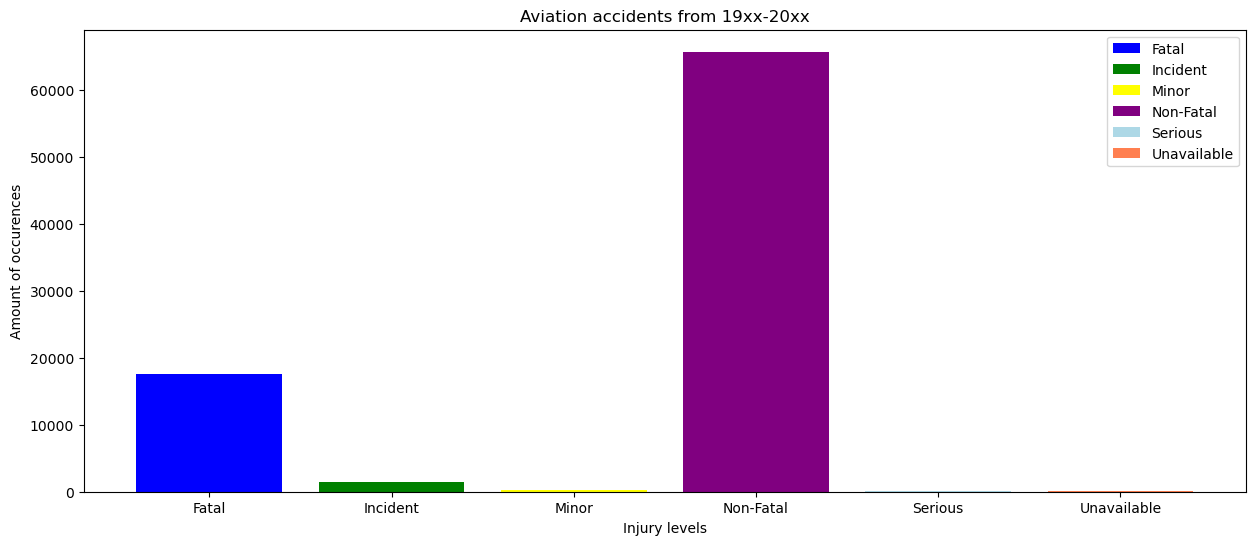

In [134]:
color = ['blue', 'green', 'yellow', 'purple', 'lightblue','coral']
fig, ax = plt.subplots(figsize=(15,6))

ax.bar(injury_type.index, injury_type[0], color=color, label=injury_type.index)
ax.set_xlabel('Injury levels')
ax.set_ylabel('Amount of occurences')
ax.set_title('Aviation accidents from 19xx-20xx')
ax.legend()
plt.show

Checking the graph above. 

We can see that a large amount of accidents resulted in Non-Fatal injuries, and significant amount of aircrafts were considered to be 'Fatal'.

Let's examine which aircrafts had fatal accidents and which aircrafts had non-fatal accidents

We'll analyze the non-fatal first, and save it to a variable

In [39]:
non_fatal_injuries = data[data['Injury.Severity'] == 'Non-Fatal']
non_fatal_injuries['Injury.Severity'].values

array(['Non-Fatal', 'Non-Fatal', 'Non-Fatal', ..., 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal'], dtype=object)

Next, we will assess aircraft damages obtained by each aircraft. Gathering information from which aircrafts are still usable

In [44]:
data['Aircraft.damage']

0          Destroyed
1          Destroyed
2          Destroyed
3          Destroyed
4          Destroyed
            ...     
88869    Substantial
88873    Substantial
88876    Substantial
88877    Substantial
88886    Substantial
Name: Aircraft.damage, Length: 85164, dtype: object

We will check to see if there are any missing values stil within the column. Even though the missing values were removed earlier. Then check to see the values within the column

In [56]:
data['Aircraft.damage'].isna().sum()

0

In [57]:
data['Aircraft.damage'].head(50).values

array(['Destroyed', 'Destroyed', 'Destroyed', 'Destroyed', 'Destroyed',
       'Substantial', 'Destroyed', 'Substantial', 'Substantial',
       'Substantial', 'Substantial', 'Substantial', 'Destroyed',
       'Destroyed', 'Destroyed', 'Destroyed', 'Destroyed', 'Destroyed',
       'Substantial', 'Substantial', 'Substantial', 'Substantial',
       'Substantial', 'Minor', 'Destroyed', 'Destroyed', 'Destroyed',
       'Substantial', 'Substantial', 'Substantial', 'Substantial',
       'Substantial', 'Destroyed', 'Destroyed', 'Destroyed',
       'Substantial', 'Destroyed', 'Destroyed', 'Destroyed', 'Destroyed',
       'Minor', 'Substantial', 'Substantial', 'Substantial',
       'Substantial', 'Substantial', 'Substantial', 'Substantial',
       'Substantial', 'Substantial'], dtype=object)

In [55]:
destroyed_aircrafts = data['Aircraft.damage'].str.count('Destroyed').sum()
destroyed_aircrafts

18550

In [80]:
destroyed_percentage = round(destroyed_aircrafts / len(data['Aircraft.damage']) * 100, 2)
print(f"Destroyed aircrafts: {destroyed_percentage}%")

Destroyed aircrafts: 21.78%


In [82]:
substantial_aircrafts = data['Aircraft.damage'].str.count('Substantial').sum()
substantial_aircrafts

63943

In [83]:
substantial_percentage = round(substantial_aircrafts / len(data['Aircraft.damage']) * 100, 2)
print(f"Substantiall damaged aircrafts: {substantial_percentage}%")

Substantiall damaged aircrafts: 75.08%


In [84]:
minor_aircraft = data['Aircraft.damage'].str.count('Minor').sum()
minor_aircraft

2579

In [86]:
minor_percentage = round(minor_aircraft / len(data['Aircraft.damage']) * 100, 2)
print(f"Minor damaged aircrafts: {minor_percentage}%")

Minor damaged aircrafts: 3.03%


In [138]:
damaged_aircrafts = data.groupby('Aircraft.damage').size().reset_index().groupby('Aircraft.damage').max()
type(damaged_aircrafts)

pandas.core.frame.DataFrame

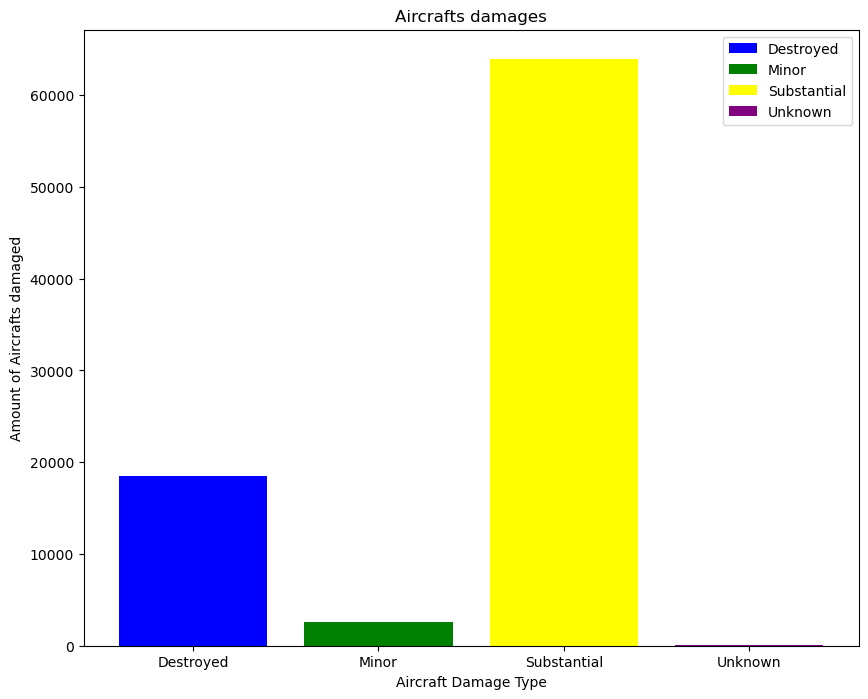

In [139]:
fig, ax = plt.subplots(figsize=(10,8))

ax.bar(damaged_aircrafts.index,damaged_aircrafts[0], color=color, label=damaged_aircrafts.index)
ax.set_xlabel("Aircraft Damage Type")
ax.set_ylabel('Amount of Aircrafts damaged')
ax.set_title('Aircrafts damages')
ax.legend()
plt.show()

As you can see, the amount of aircrafts that have **substantial damage equate to 75.06%** of the amount of planes. While aircrafts considered **destroyed amount to 21.78%**. Aircrafts with **minor damage equate for 3.03%** of the total amount of planes damaged. Let's focus on the aircrafts that have been in non-fatal accidents and are reported with minor damages

Based on the definitions provided by the NTSB and FAA:

* **Destroyed** -  if all of its primary structure is damaged to the extent that it would be impracticable to return the aircraft to an airworthy condition by repair.
* **Substantial** - damage means damage or failure which adversely affects the structural strength, performance, or flight characteristics of the aircraft, and which would normally require major repair or replacement of the affected component.
* **Minor** - means the aircraft either is in an airworthy condition or is restorable to airworthy condition by minor repairs.